In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data=pd.read_csv("mushrooms.csv")

In [37]:
print(data.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

print(data)

      class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                 

In [41]:
x = data.drop('class',axis=1) 
y = data['class'] 

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [61]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 1.0


In [65]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')  
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [69]:
y_pred = svm.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9729230769230769


In [71]:
model_name=[]
score=[]
model_name.append("KNN")
score.append(accuracy)
model_name.append("SVM ")
score.append(accuracy)

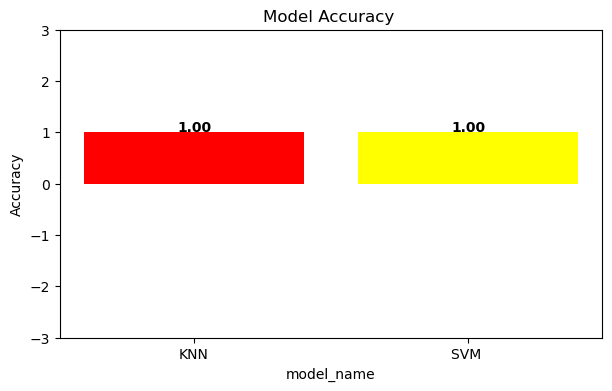

In [73]:
plt.figure(figsize=(7,4))
plt.bar(model_name,score,color=(['red','yellow']),label='Actual Data')

plt.xlabel("model_name")
plt.ylabel("Accuracy")

plt.ylim(-3,3)
plt.title("Model Accuracy ")
for i,v in enumerate(score):
    plt.text(i,v+0.02,f"{v:.2f}",ha="center",fontweight='bold')
plt.show()